In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Lista de Cáculo Numérico

Problema 1: Considere o seguinte sistema de equações lineares:
 $$
 \left\{\begin{matrix}
x_{1} + 2x_{2} - x_{3} + 0x_{4} = 1 &  &  & \\ 
2x_{1} - x_{2} + 0x_{3} + 0x_{4} = 1 &  &  & \\ 
0x_{1} - x_{2} + 2x_{3} - x_{4} = 1 &  &  & \\ 
0x_{1} + 0x_{2}-x_{3}+2x_{4} = 1 &  &  & 
\end{matrix}\right.
 $$

## a: Mostre que esse sistema não satisfaz o critério de linhas

O critério de linhas diz que o módulo de cada elemento da diagonal principal, deve ser maior que a soma dos módulos dos elementos restantes da linha.

Ex:
    $$
        \left \| a_{11} \right \| > \left \| a_{12} \right \| +\left \| a_{13} \right \|
    $$

O critério das linhas pode ser descrito da seguinte forma:

$$
\alpha _{k} = \frac{1}{\left \| a_{kk} \right \|}\sum_{\underset{j\neq k}{j=1}}^{n}\left \| a_{kj} \right \|
$$

Então será feito o seguinte: Será determinada uma função que receberá um array np, e tratará conforme a definição acima. Caso o coeficiente máximo encontrado seja menor que 1, verifica-se a convergência.

In [68]:
def jacobi(arr):
    termos = []
    coeficientes = 0
    arr = np.absolute(arr)
    
    for i in range(arr.shape[0]):
        for j in range(arr.shape[0]):
            if(j != i):
                coeficientes += arr[i][j]
            
        termos.append(coeficientes * (1/arr[i][i]))
        coeficientes=0
            
    return termos
        
    

In [69]:
arr = np.array([[1,2,-1,0],[2,-1,0,0],[0,-1,2,-1],[0,0,-1,2]])
np.max(jacobi(arr))

3.0

Percebemos, pelo algoritmo, que o sistema não obedece o critérios de linhas pois o coeficiente máximo alcançado é 3, logo, não converge para Jacobi.

## b: Enuncie o critério de Sassenfeld e mostre que esse sistema não satisfaz o critério de Sassenfeld

O critério de Sassenfeld é muito parecido com o critério das linhas, porém, é multiplicado o coeficiente anterior pelo número adjacente ao diagonal anterior. O algorítmo será desenvolvido a partir da definição algébrica.

O critério de Sessenfeld pode ser descrito algebricamente da seguinte forma:

$$
\beta _{k} = \frac{1}{a_{kk}}\left ( \sum_{j=1}^{k-1}\left \| a_{kj} \right \| \beta _{j}+\sum_{j=k+1}^{n}\left \| a_{kj} \right \| \right )
$$

In [70]:
def sassenfeld(arr):
    termos = []
    coeficientes = 0
    arr = np.absolute(arr)
    print(arr)
    
    for i in range(arr.shape[0]):
        coeficientes = 0
        if(i>1):
            for j in range(i):
                coeficientes += arr[i][j] * termos[j]
            for j in range(i+1, arr.shape[0]):
                coeficientes += arr[i][j]
        elif(i == 1):
            coeficientes += arr[i][0] * termos[0]
            for j in range(i+1, arr.shape[0]):
                coeficientes += arr[i][j]
        elif(i==0):
            for j in range(i+1, arr.shape[0]):
                coeficientes += arr[i][j]
        termos.append(coeficientes * (1/arr[i][i]))
            
            
    return termos
   

In [71]:
arr = np.array([[1,2,-1,0],[2,-1,0,0],[0,-1,2,-1],[0,0,-1,2]])
sassenfeld(arr)

[[1 2 1 0]
 [2 1 0 0]
 [0 1 2 1]
 [0 0 1 2]]


[3.0, 6.0, 3.5, 1.75]

Percebe-se que o sistema, em sua forma atual, não satisfaz o critério de Sassenfeld pois o máximo é 6, que é maior que 1

## c: O que se pode afirmar sobre a convergência dos métodos de Gauss-Jacobi e Gauss-seidel, quando aplicados a este sistema?

Pode-se afirmar que o sistema não satisfaz nenhum dos critérios

## d: Mostre que o sistema obtido permutando-se as duas primeiras equações satisfaz o critério de Sassenfeld

In [72]:
arr = np.array([[2,-1,0,0],[1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]])
sassenfeld(arr)

[[2 1 0 0]
 [1 2 1 0]
 [0 1 2 1]
 [0 0 1 2]]


[0.5, 0.75, 0.875, 0.4375]

Realmente satisfaz, pois o máximo é 0.875, que é menor que 1

## e: Usando o método de Gauss-Seidel, determine a solução aproximada do sistema, com a permutação sugerida no item anterior e erro = 0.001

Teremos que fazer uma função que recebe nosso array np, para que possa ser aplicado o método de Gayuss-Seidel.

O método de Gauss-Seidel pode ser escrito algebricamente da seguinte forma:

$$
x^{k+1} = Tx^{k} + C
$$
onde
$$
T = -L^{-1}_{*}U
$$
e
$$
C = L^{-1}_{*}b
$$

Sabemos que $L_{*}$ é a matriz triangular inferior com a diagonal da matriz principal, e $U$ é a matriz triangular superior com a diagonal zerada.

In [73]:
def gaussSeidel(arr,x,b):
    
    
    #pegando matriz triangular inferior
    l = np.copy(np.tril(arr))
    
    #pegando matriz triangular superior com diagonal zerada
    r = np.copy(np.triu(arr))
    np.fill_diagonal(r, 0)
    
    
    #t corresponde a primeira parte da equação de gauss-seidel
    t = np.copy(np.matmul(-np.linalg.inv(l),r))
    
    #c corresponde a segunda parte da equação de gauss-seidel
    c = np.copy(np.matmul(np.linalg.inv(l),b))
    
    
    x = np.matmul(t,x) + c
    
    return x


In [74]:
arr = np.array([[2,-1,0,0],[1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]])
x = np.array([[0.5],[0.5],[0.5],[0.5]])
b = np.array([[1],[1],[1],[1]])

for i in range(20):
    x = gaussSeidel(arr,x,b)
print(x)

result = x[0] + 2*x[1] - x[3]
print('')
print(result)

[[0.90909089]
 [0.8181818 ]
 [1.54545452]
 [1.27272726]]

[1.27272723]


## 2) Um jogador de futebol americano está prestes a fazer um lançamento para outro jogador de seu time. O lançador tem uma altura de 1, 82 m e o outro jogador está 18, 2 m afastado. A expressão que descreve o movimento da bola é familiar equação da física que descreve o movimento do projétil:

$$
y = xtan(\theta)-\frac{1}{2}.\frac{ {x^{2}}g }{ {v^{2}_{0}} {cos^{2}(\theta)} } + h
$$

onde iremos isolar o y para que achemos o valor que zera a função, ficando: 
$$
0 = xtan(\theta)-\frac{1}{2}.\frac{ {x^{2}}g }{ {v^{2}_{0}} {cos^{2}(\theta)} } + h - y
$$

onde x e y são as distâncias horizontal e vertical, respectivamente, g = $9.81 \frac{m}{s^{2}}$ é a aceleração da gravidade. $v_{0}$ é a velocidade inicial da bola quando deixa a mão do lançador e θ é o ângulo que a bola faz com o eixo horizontal nesse mesmo instante. Para v0 = 15.2 m/s, x = 18, 2 m, h = 1, 82 m e y = 2, 1 m, determine o ângulo θ no qual o jogador lança a bola. Observação: o estudante não precisa saber física e nem dominar a teoria, basta substituir os valores e montar a função da qual queremos encontrar os zeros.

A função em questão fica:

$$
f(\theta) = 18.2tg(\theta) - \frac{14}{cos^{2}(\theta)} - \frac{28}{100}
$$

função que queremos encontrar o 0

Por iteração podemos encontrar o valor aproximado de teta. Montaremos um arranjo com o numpy, indo de 0 até $2\pi$, com passos pequenos de 0.0001 para melhor exatidão.
Definiremos a função para podemos jogar os valores

In [75]:
thetas = np.arange(0,2*np.pi, 0.0001)

In [76]:
def funcao(t,x,v,h,y,g):
    first = x*np.tan(t)
    second = ((x**2)*g)/(2 * (v**2) * ( np.cos(t)**2))
    return first - second + h - y

In [77]:
angulos = {}
for i in thetas:
    result = funcao(t = i, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81)
    if(math.floor(result) == 0 and result > 0):
        angulos[i] = result

In [78]:
min(angulos, key=angulos.get)

0.4616

In [79]:
angulos[0.4616]

0.0010804747745178922

A partir das iterações, descobrimos que o valor do ângulo é 0.4616.

## a) Use a bisseção para encontrar um intervalo menor que 0.1 que contenha a raiz da equação.

O método da bisseção se aproveita do teorema de Bolzano, que é descrito da seguinte forma:

Se f:[a,b] $\: \rightarrow \: \mathbb{R}$, $y = f(x)$ é uma função contínua tal que $f(a).f(b) < 0$, então $\exists \: x^{*} \in (a,b)$ tal que $f(x^{*}) = 0$

traduzindo: dentro do intervalo no intervalo [a,b], se $f(a).f(b) < 0$, existe um x dentro do intervalo que zera a função

A questão pede que encontremos um intervalo menor que 0.1 que satisfaça o que pedimos. Ou seja, a distância entre o mínimo do intervalo e o máximo do intervalo, deve ser menos que 0.1. Vamos tomar, então, os valores 0.43 e 0.5 como teste.

In [80]:
lower = 0.43
highest = 0.5

In [81]:
highest-lower

0.07

In [82]:
a = funcao(t = lower, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81)
b = funcao(t = highest, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81)

In [83]:
a*b

-0.23632394655500588

Como a * b, que são os resultados da nossa função para 0.43 e 0.5 resultaram em um número menor que 0, que é -0.2343, então dentro deste intervalo existe um número que zera nossa função.

O método da bisseção, por sua vez, utiliza o ponto médio, iterando, para chegar no resultado. logo $x_{0} = \frac{a+b}{2}$. Dentro do método da bisseção, temos a seguinte definição:
se $f(a).f(x_{0}) < 0$ então $a = x_{0}$
ou, caso $f(x_{0}).f(b) < 0$, então $b = x_{0}$

In [84]:
def bissecao(a,b, func):
    maximo = 0
    for i in range(1000):
        maximo = (a+b)/2
        if(func(t = a, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) * func(t = maximo, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) < 0):
            b = maximo
        elif(func(t = maximo, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) * func(t = b, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) < 0):
            a = maximo
            
    return maximo
            

In [85]:
aproximacao = bissecao(lower, highest,funcao)

In [86]:
aproximacao

0.46152269273644486

In [87]:
round(funcao(t = aproximacao, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81), 3)

-0.0

Percebemos então, que pela aproximação do método da bisseção, o resultado é 0.4615

## b) Use Newton-Rapshon para encontrar uma solução com erro menor que $10^{-4}$.

O método de Newton-Rapshon é um pouco diferente, mas ainda é um método iterativo que utiliza derivadas.
O método de Newton-Raphson e definido da seguinte forma:

$$
x^{(n+1)} = x^{(n)} - \frac{f(x^{(n)})}{f'(x^{n})}
$$

A derivada de nossa função, ou $f'(x)$ é:

$$
f'(x) = xsec^{2}(\theta) - \frac{ x^{2} g sec^{2}(\theta) tan^{2}(\theta) }{v^{2}_{0}}
$$

In [88]:
def derivada(t,x,g,v):
    first = x * (1/(np.cos(t)**2))
    second = (x**2 * g * (1/(np.cos(t)**2))) * (np.tan(t)**2)/v**2
    return first - second

In [89]:
def newton_raphson():
    val = 0
    for i in range(1000):
        val = val - funcao(t = val, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81)/derivada(t = val, x=18.2, v=15.2, g=9.81)
    return val

In [90]:
newton_raphson()

0.46152269273644486

Pecebemos então que a resposta pelo Newton Raphson, que é 0.4615 bate com as demais.

## Use a Posição Falsa para encontrar uma solução com erro menor que $10^{-4}$.

O método da Posição Falsa é uma modificação do método da bisseção.
Como o método da bisseção converge de maneira lenta, faremos uma mudança no algorítmo.
$$
x_{n} = \frac{af(b)-bf(a)}{f(b)-f(a)}
$$
Assim como no método da bisseção, temos que ter $f(a)f(b) < 0$ para que a resposta esteja no intervalo, e temos a mesma relação:
$$
Se \: f(a)f(x_{n}) < 0 \: entao\: a = x_{n}
\\
ou \: se f(b)f(x_{n}) < 0 \: entao \: b = x_{n}
$$

In [91]:
def posicao_falsa(a,b, func):
    resultado = 0
    for i in range(1000):
        resultado = (a*func(t = b, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) - b*func(t = a, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81))/(func(t = b, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) - func(t = a, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81))
        if(func(t = a, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) * func(t = resultado, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) < 0):
            b = resultado
        elif(func(t = resultado, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) * func(t = b, x=18.2, v=15.2, h=1.82, y=2.1, g=9.81) < 0):
            a = resultado
        
    return resultado

In [92]:
posicao_falsa(0.43, 0.5, funcao)

0.46152269273644486

Percebemos, então que todos os resultados batem.

## Realize a regressão linear para o seguinte problema: Peso corporal dos cordeiros tem relação com o peso do Rendimento em carne no animal, aos 4 meses de idade, de 10 cordeiros da raça Hampshire Down renderam respectivamente:

In [94]:
tabela = np.array([
    [49, 24],
    [65, 40],
    [45, 25],
    [40, 23.5],
    [55, 33.5],
    [45,22],
    [44,22.5],
    [47, 23.5],
    [50, 25],
    [56,35]
])
df = pd.DataFrame(tabela, columns = ['Peso', 'Rend. Carcaça'])

In [95]:
df

,Peso,Rend. Carcaça
0,49.0,24.0
1,65.0,40.0
2,45.0,25.0
3,40.0,23.5
4,55.0,33.5
5,45.0,22.0
6,44.0,22.5
7,47.0,23.5
8,50.0,25.0
9,56.0,35.0


## a) Esboce o gráfico dos dados e tente chutar se a relação é crescente ou decrescente. Os dados estão formando aproximadamente uma reta?

In [119]:
x = np.array(df.loc[:, 'Peso'])
y = np.array(df.loc[:, 'Rend. Carcaça'])

<AxesSubplot: >

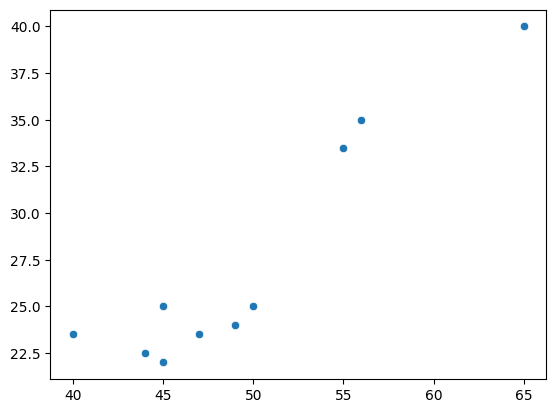

In [120]:
sns.scatterplot(x=x, y=y)

Percebe-se que mesmo um pouco distantes, fica clara a relação crescente. Além disto, os dados não formam claramente uma reta, pois se dispersam.

Sabemos que para utilizar os metodos iterativos de resolucao de sistemas, ele deve ser quadrado, e para ter resposta, todos os dados devem estar alinhados perfeitamente em uma reta, o que nao acontece neste caso, entao, utilizaremos regressao linear.
A regressão linear tem como objetivo desenvolver uma função linear que passe o mais próximo possível dos pontos, sem necessariamente interpolá-los.

Logo, a regressão linear busca uma resposta da seguinte forma: $f(x)=ax+b$ para os pontos dados.

Pela definição do livro que tomamos como base, nos livrando dos rigores da demonstração, segue o cálculo que deve ser feito para que, utilizando as formas matriciais, cheguemos ao resultado do coeficiente a e b:

$$
a = (V^{T}V)^{-1}V^{T}y
$$
Onde $V$ é a matriz dos coeficientes de $a$ e $b$, e $y$ é a matriz dos resultados.

A partir disso, será desenvolvida a função mais geral da regressão linear:

In [121]:
def regressao_linear(arr_coeficientes, arr_resultados):
    a = arr_coeficientes
    b = arr_resultados
    
    result = np.matmul(np.matmul(np.linalg.inv((np.matmul(a.T,a))),a.T), b)
    return result

In [150]:
coeficientes = []
for i in range(10):
    coeficientes.append([1,x[i]])

coeficientes = np.array(coeficientes)

resultado = np.copy(y.reshape(10,1))

cof = regressao_linear(coeficientes, resultado)


In [151]:
cof

array([[-12.61865112],
       [  0.80682764]])

## Percebemos, então, que pela regressão linear, o coeficiente $a=0.8068$ e o coeficiente $b=-12.6186$

Agora, fazendo o gráfico:

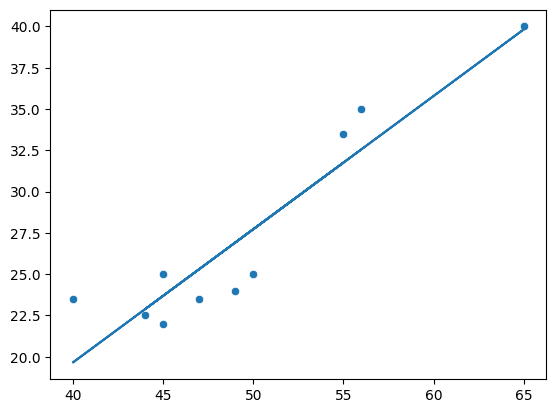

In [149]:
sns.scatterplot(x=x,y=y)

line = cof[0][0] + cof[1][0] * x

plt.plot(x,line)

# C) Calcule o coeficiente de $R^{2}$ (coeficiente de correlação)

O coeficiente de correlação é dado pela seguinte fórmula:
$$
r = \frac{\sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}.\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}}
$$

Então, precisamos calcular a média dos vetores informados, e após isso, poderemos calcular tranquilamenteo coficiente.

In [ ]:
def coeficiente_correlacao(x,y):
    media = 